

## 1. SciKit Learn Hands-on

We will now run some experiments to familiarize you with the statistical learning tools in SciKit Learn.

### 1.1 Linear Regression

Let's begin by playing around with the linear regression we did for the Boston Housing Dataset during the lecture. 

#### 1.1.1 Finding Better Correlations

_Question 0: (4 marks)_

In the lecture we took a quick look at correlating housing prices and poverty levels.  Using the code cell below:

    1. Recreate the regression example from the lecture Jupyter Notebook. Set random_state to 0 for train_test_split.
    2. Add code to find the correlation between housing prices and the other independent variables in the dataset. Leave out CHAS (Charles River dummy variable) and MEDV.
    3. As before save 33% of the data for testing and set random_state to 0.
    4. Create a new simple (single independent variable) regression model with the independent variable with the absolute highest correlation. If poverty levels is the highest, then choose the next highest.
    5. Compute and print the MSE for training data and testing data, and answer the questions after the code block.


### 1.1.1 Finding Better Correlations

1. Recreate the regression example from the lecture Jupyter Notebook. Set random_state to 0 for train_test_split.




In [1]:
"""
    Enter your code for part 1.1.1 here, and answer the questions
    after this code cell.
"""

# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
warnings.simplefilter("ignore")



In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.data.shape

(506, 13)

In [3]:

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [4]:
df = bos
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [5]:
df = bos.drop(columns=['CHAS'])
df.head()

CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33

In [6]:
bos['PRICE'] = boston.target
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

2. Add code to find the correlation between housing prices and the other independent variables in the dataset. Leave out CHAS (Charles River dummy variable) and MEDV.
  

In [7]:
##  Add code to find the correlation between housing prices and the other independent variables in the dataset. Leave out CHAS (Charles River dummy variable) and MEDV.
## Finding the Relationship Between Property Prices with all other variables


print("Correlation between property prices and  per capita crime rate by town: %3.3f"
     % bos['PRICE'].corr(bos['CRIM']))

print("Correlation between property prices and proportion of residential land zoned: %3.3f"
     % bos['PRICE'].corr(bos['ZN']))

print("Correlation between property prices and proportion of non-retail business acres per town: %3.3f"
     % bos['PRICE'].corr(bos['INDUS']))
     
print("Correlation between property prices and nitric oxides concentration : %3.3f"
     % bos['PRICE'].corr(bos['NOX']))

print("Correlation between property prices and average number of rooms: %3.3f"
     % bos['PRICE'].corr(bos['RM']))

print("Correlation between property prices and proportion of owner-occupied units built prior to 1940: %3.3f"
     % bos['PRICE'].corr(bos['AGE']))

print("Correlation between property prices and weighted distances to five Boston employment centres: %3.3f"
     % bos['PRICE'].corr(bos['DIS']))

print("Correlation between property prices and index of accessibility to radial highways: %3.3f"
     % bos['PRICE'].corr(bos['RAD']))

print("Correlation between property prices and full-value property-tax rate per $10,000: %3.3f"
     % bos['PRICE'].corr(bos['TAX']))

print("Correlation between property prices and pupil-teacher ratio by town: %3.3f"
     % bos['PRICE'].corr(bos['PTRATIO']))

print("Correlation between property prices and proportion of black people by town: %3.3f"
     % bos['PRICE'].corr(bos['B']))

print("Correlation between property prices and poverty levels: %3.3f"
     % bos['PRICE'].corr(bos['LSTAT']))

Correlation between property prices and  per capita crime rate by town: -0.388
Correlation between property prices and proportion of residential land zoned: 0.360
Correlation between property prices and proportion of non-retail business acres per town: -0.484
Correlation between property prices and nitric oxides concentration : -0.427
Correlation between property prices and average number of rooms: 0.695
Correlation between property prices and proportion of owner-occupied units built prior to 1940: -0.377
Correlation between property prices and weighted distances to five Boston employment centres: 0.250
Correlation between property prices and index of accessibility to radial highways: -0.382
Correlation between property prices and full-value property-tax rate per $10,000: -0.469
Correlation between property prices and pupil-teacher ratio by town: -0.508
Correlation between property prices and proportion of black people by town: 0.333
Correlation between property prices and poverty leve

3. As before save 33% of the data for testing and set random_state to 0.
4. Create a new simple (single independent variable) regression model with the independent variable with the absolute highest correlation. If poverty levels is the highest, then choose the next highest.


In [8]:
# Property Prices highly depend on Number of rooms. 
print("Correlation between property prices and average number of rooms: %3.3f"
     % bos['PRICE'].corr(bos['RM']))

Correlation between property prices and average number of rooms: 0.695


In [9]:
X = bos['RM'].values.reshape(-1, 1)
Y = bos['PRICE'].values.reshape(-1, 1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)


We will verify that we indeed have 33% of our data for testing:

In [11]:
all_rows = X.shape[0]
test_rows = X_test.shape[0]
print("%%age of data used for test: %3.2f%%" % (test_rows / all_rows * 100.0))

%age of data used for test: 33.00%


### Creating the Regression Model


In [12]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

Now we can use the fit method to learn from our data, and look at the coefficient and intercept for our model:


In [13]:
lm.fit(X_train, Y_train)
print("Coefficient: %3.4f, Intercept: %3.4f." % (lm.coef_, lm.intercept_))

Coefficient: 8.6598, Intercept: -31.8194.



5. Compute and print the MSE for training data and testing data, and answer the questions after the code block.

In [14]:
Y_pred_train = lm.predict(X_train)
Y_pred_test = lm.predict(X_test)
train_mse = metrics.mean_squared_error(Y_train, Y_pred_train)
test_mse = metrics.mean_squared_error(Y_test, Y_pred_test)
train_rmse = np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train))
test_rmse = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test))

print("MSE for training data: %3.4f. MSE for testing data: %3.4f." % (train_mse, test_mse))
print("RMSE for training data: %3.4f. RMSE for testing data: %3.4f." % (train_rmse, test_rmse))

                

MSE for training data: 44.0507. MSE for testing data: 42.9942.
RMSE for training data: 6.6371. RMSE for testing data: 6.5570.


Answer the following questions between the \*\* markdowns so that your answers appear in bold.

***
_Question 1: Which independent variable has the highest correlation? Did it have any effect on your training and test accuracy scores? Why or why not?_ (2 marks)

***

**Answer: After poverty levels, Price has highest correlation with "RM - average number of rooms per dwelling". i.e 0.695. After comparing it with Poverty Levels, the error rates for both Training and Testing have slightly increased.** 

#### 1.1.2 Creating Multivariate Linear Regressions ####

SciKit learn can create linear regression models with multiple independent variables, and in this section we are going to explore how to do this, and whether or not it makes a difference in our Boston Dataset.

One way to create a multivariate model is to:

    1. Rank the independent variables by correlation, then create a linear model using the independent variable with the highest correlation. Measure the training and testing accuracy.
    2. Add in the independent variable with the next highest correlation and create a new linear model.  Measure the training and testing accuracy.
    3. Stop when either accuracy score levels off or goes down.

Answer the following questions to help you along with creating your multivariate model:

***

_Question 2: Explain what the following code fragment does. You may refer to NumPy and SciKit Learn documentation_ (2 marks)

```
bos['PRICE'].values.reshape(-1, 1)
```

**Answer: Scikit-learn transformers and estimators expect to be fed their predictive X data in two-dimensional form. The target variable, y is expected to be one-dimensional. When we are transforming with 1 input variable i.e. X, the function expects a 2d array, error would be thrown, the reshape function converts the 1d X variable in to desired 2d format.** 

_Question 3: Consult the NumPy documentation: What does the 'concatenate' function do? In particular what does 'axis=1' do?_ (2 marks)

**Answer: Concatenate function is used to join two or more arrays of the same shape along a specified axis. The axis parameter specifies the axis along which the arrays will be joined. Axis =1 means that the arrays will be concatenated horizontally. i.e adding a new column instead of adding a new row.** 

_Question 4: Given your answers to Questions 2 and 3, what does the following code do?_ (2 marks)

```
import numpy as np

... Other code here ...

X1 = bos['INDUS'].values.reshape(-1, 1)
X2 = bos['CRIM'].values.reshape(-1, 1)
X = np.concatenate((X1, X2), axis = 1)
```

**Answer: Two 2d arrays of with 1 column each would be created first, each having values of INDUS and CRIM respectively. Then the concatenate function will combine them and create a new 2d array 'X' of 2 columns, 1st column will have the value from INDUS and 2nd will have the value of CRIM.** 

***

Use the following code cell to follow the steps above to create models with one, two and three independent variables, printing the training and testing accuracy each time. Note that you have to run _train_test_split_ for each model. Set the _random_state_ parameter in _train_test_split_ to 0 each time. (4 marks)

### Top 3 independent variables on Price are: 
1. Poverty levels
2. Number of Rooms
3. pupil-teacher ratio by town

In [15]:
"""
    Enter your code for part 1.1.2 here. 
"""
# Poverty Levels
print("Correlation between property prices and poverty levels: %3.3f"
     % bos['PRICE'].corr(bos['LSTAT']))

# Number of rooms. 
print("Correlation between property prices and average number of rooms: %3.3f"
     % bos['PRICE'].corr(bos['RM']))

#pupil-teacher ratio by town
print("Correlation between property prices and pupil-teacher ratio by town: %3.3f"
     % bos['PRICE'].corr(bos['PTRATIO']))



Correlation between property prices and poverty levels: -0.738
Correlation between property prices and average number of rooms: 0.695
Correlation between property prices and pupil-teacher ratio by town: -0.508


### With 1 variable i.e. Poverty Level Only 

In [16]:
X = bos['LSTAT'].values.reshape(-1, 1)
Y = bos['PRICE'].values.reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

all_rows = X.shape[0]
test_rows = X_test.shape[0]
print("%%age of data used for test: %3.2f%%" % (test_rows / all_rows * 100.0))
### Creating the Regression Model

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train, Y_train)
print("Coefficient: %3.4f, Intercept: %3.4f." % (lm.coef_, lm.intercept_))

Y_pred_train = lm.predict(X_train)
Y_pred_test = lm.predict(X_test)
train_mse = metrics.mean_squared_error(Y_train, Y_pred_train)
test_mse = metrics.mean_squared_error(Y_test, Y_pred_test)
train_rmse = np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train))
test_rmse = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test))

print("MSE for training data: %3.4f. MSE for testing data: %3.4f." % (train_mse, test_mse))
print("RMSE for training data: %3.4f. RMSE for testing data: %3.4f." % (train_rmse, test_rmse))

                

%age of data used for test: 33.00%
Coefficient: -0.9354, Intercept: 34.3758.
MSE for training data: 37.1651. MSE for testing data: 41.1916.
RMSE for training data: 6.0963. RMSE for testing data: 6.4181.


### With 2 variables Poverty level and Number of rooms


In [17]:
X1= bos['LSTAT'].values.reshape(-1, 1)
X2= bos['RM'].values.reshape(-1, 1)
X = np.concatenate((X1, X2), axis = 1)
Y = bos['PRICE'].values.reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

all_rows = X.shape[0]
test_rows = X_test.shape[0]
#print("%%age of data used for test: %3.2f%%" % (test_rows / all_rows * 100.0))
### Creating the Regression Model

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train, Y_train)
#print("Coefficient: %3.4f, Intercept: %3.4f." % (lm.coef_, lm.intercept_))

Y_pred_train = lm.predict(X_train)
Y_pred_test = lm.predict(X_test)
train_mse = metrics.mean_squared_error(Y_train, Y_pred_train)
test_mse = metrics.mean_squared_error(Y_test, Y_pred_test)
train_rmse = np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train))
test_rmse = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test))

print("MSE for training data: %3.4f. MSE for testing data: %3.4f." % (train_mse, test_mse))
print("RMSE for training data: %3.4f. RMSE for testing data: %3.4f." % (train_rmse, test_rmse))

                

MSE for training data: 30.2773. MSE for testing data: 31.1729.
RMSE for training data: 5.5025. RMSE for testing data: 5.5833.


### With 3 variables Poverty level, Number of rooms and pupil-teacher ratio by town


In [18]:
X1= bos['LSTAT'].values.reshape(-1, 1)
X2= bos['RM'].values.reshape(-1, 1)
X3= bos['PTRATIO'].values.reshape(-1, 1)
X = np.concatenate((X1, X2,X3), axis = 1)
Y = bos['PRICE'].values.reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

all_rows = X.shape[0]
test_rows = X_test.shape[0]
#print("%%age of data used for test: %3.2f%%" % (test_rows / all_rows * 100.0))
### Creating the Regression Model

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train, Y_train)
#print("Coefficient: %3.4f, Intercept: %3.4f." % (lm.coef_, lm.intercept_))

Y_pred_train = lm.predict(X_train)
Y_pred_test = lm.predict(X_test)
train_mse = metrics.mean_squared_error(Y_train, Y_pred_train)
test_mse = metrics.mean_squared_error(Y_test, Y_pred_test)
train_rmse = np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train))
test_rmse = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test))

print("MSE for training data: %3.4f. MSE for testing data: %3.4f." % (train_mse, test_mse))
print("RMSE for training data: %3.4f. RMSE for testing data: %3.4f." % (train_rmse, test_rmse))

                

MSE for training data: 24.5197. MSE for testing data: 33.2464.
RMSE for training data: 4.9517. RMSE for testing data: 5.7660.


### The Accuracy has significantly increased by having Multiple Linear Regression with top 3 variables. 

--------------------------------------
--------------------------------------


### 1.2 Creating a Naive Bayes Classifier ###

We will now look at how to create a Naive Bayes Classifier, and later on a Support Vector Machine classifier. We will also explore the use of _GridSearchCV_ to optimize the choice of parameters for the SVC.

#### 1.2.1 The Irises Dataset ###

In this lab we will use the irises dataset to classify four categories of irises (a species of flowers). We will consider four factors:

    1. Sepal length in cm
    2. Sepal width in cm
    3. Petal length in cm
    4. Petal width in cm

The image below shows what these mean:

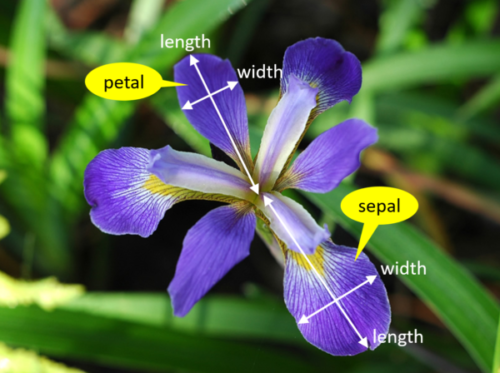

The code cell below loads up the Iris dataset, prints it out, then scales it.

In [19]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

iris_data = load_iris()
print("Iris Data:")
print(iris_data.data)
scaler = StandardScaler()
scaler.fit(iris_data.data)
X = scaler.transform(iris_data.data)
y = iris_data.target


Iris Data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 

Answer the following questions:

_Question 5: What does 'StandardScaler' do? What other types of scalers are available? What is the advantage of scaling your inputs?_ (2 marks)

**Answer:The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. In this way, variables with high variance wont dominate the machine learning algorithm. Other scalers are 1. StandardScaler 2. MinMaxScaler 3. MaxAbsScaler 4. RobustScaler 5. PowerTransformer 6. QuantileTransformer (uniform output) 7. QuantileTransformer (Gaussian output) 8. Normalizer. Scaling is important as if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.** 

#### 1.2.2 Creating a Naive Bayes Classifier Model

Recall that there are three major types of Naive Bayes classifiers:

    1. Gaussian
    2. Multinomial
    3. Bernoulli
    
_Question 6: What type of model should we use here? Why?_ (2 marks)

**Answer: As our features are continuous, we would be using Gaussian classifier, Multinomial is used when the column values represent count of something and Bernoulli is used when the column values are binary.** 


Now complete the code in the code cell below, following these specifications: (4 marks)

    1. Set aside 20% of the data for testing.
    2. Use the appropriate type of Naive Bayes Classifier, adding in whatever import statements you require here.
    3. Print out the training and testing accuracies.
    

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((120, 4), (30, 4), (120,), (30,))

In [22]:
"""
    Enter your code for part 1.2.2 here. 
"""
from sklearn.naive_bayes import GaussianNB

# Setting Descriptive and Target features

iris_data = load_iris()
scaler = StandardScaler()
scaler.fit(iris_data.data)
X = scaler.transform(iris_data.data)
y = iris_data.target


# Gaussian Classifier
clf = GaussianNB()

#Splitting in to training and Testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Train using our training data
clf.fit(X_train, y_train)

# Prediction
Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score_train = accuracy_score(Y_pred_train, y_train)
accuracy_score_test = accuracy_score(Y_pred_test, y_test)

print('Accuracy for Training set: ',accuracy_score_train)
print('Accuracy for Training set: ',accuracy_score_test)



Accuracy for Training set:  0.95
Accuracy for Training set:  0.9666666666666667


#### 1.2.3 Using Pipelines ####

In the Naive Bayes Jupyter Notebook included with your Lecture 4 slides, we used a _Pipeline_ object to simplify our code. Using that example as a guide, rewrite your code above to use _Pipeline_. Some things to note:

    1. The code will not be exactly the same (it will be much simpler). For example we are not using a CountVectorizer nor a TfidfTransformer. So just follow the principle. Remember to put your StandardScaler into the Pipeline.
    2. When doing 'fit' on your model, you should input the _original_ data, not the scaled one, since we are incorporating the StandardScaler as part of our Pipeline.

**Hint: Section 1.3.2 below shows you how to create a Pipeline for SVM**

Use the code cell below to enter your new version using Pipelines. Remember to print out your training and testing accuracies. (4 marks)


In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# Setting Descriptive and Target features
iris_data = load_iris()
X = iris_data.data
y = iris_data.target


#Splitting in to training and Testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Making Pipeline
NB_pipe_2 = Pipeline([('scaler', StandardScaler()), ('NB', GaussianNB())])
NB_pipe_2.fit(X_train, y_train)

# Prediction
Y_pred_train = NB_pipe_2.predict(X_train)
Y_pred_test = NB_pipe_2.predict(X_test)

# Evaluating Accuracy 
accuracy_score_train = accuracy_score(Y_pred_train, y_train)
accuracy_score_test = accuracy_score(Y_pred_test, y_test)

print('Accuracy for Training set: ',accuracy_score_train)
print('Accuracy for Training set: ',accuracy_score_test)






Accuracy for Training set:  0.95
Accuracy for Training set:  0.9666666666666667


## 1.3 Creating a Support Vector Machine Classifier ###

We will now create an SVM to perform our classification. There are two major SVM classifiers provided with SciKit Learn:

    1. LinearSVC: An SVM that uses a linear decision boundary to classify.
    2. SVC: An SVM that offers a wider variety of classification boundaries: Radial Basis Function (so-called 'kernel'), sigmoid, polynomials, and of course a linear boundary.
    
#### 1.3.1 Creating a Linear SVM ####

Using your code from 1.2.3 as a guide, create a new Pipeline to train a LinearSVC with the following parameters:

    - max_iter: 100000
    - loss: hinge
    - penalty: l2      (Note: This is 'el-two', and not 'twelve')
    
Use the code cell below to implement your SVM, printing out your training and testing accuraces. Please consult the SciKit Learn documentation on what these parameters mean. (4 marks)


In [24]:
"""
    Enter your code for part 1.3.1 here. 
"""

from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Setting Descriptive and Target features
iris_data = load_iris()
X = iris_data.data
y = iris_data.target


#Splitting in to training and Testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

svm_pipe = Pipeline([('scaler', StandardScaler()), 
('svm', svm.LinearSVC(max_iter= 10000, loss= 'hinge', penalty = 'l2'))])
svm_pipe.fit(X_train, y_train)

Y_train_pred_1 = svm_pipe.predict(X_train)
Y_test_pred_1 = svm_pipe.predict(X_test)


# Evaluating Accuracy 
accuracy_score_train = accuracy_score(Y_train_pred_1, y_train)
accuracy_score_test = accuracy_score(Y_test_pred_1, y_test)

print('Accuracy for Training set: ',accuracy_score_train)
print('Accuracy for Training set: ',accuracy_score_test)

Accuracy for Training set:  0.9083333333333333
Accuracy for Training set:  0.8666666666666667


In [25]:
# svm_pipe = Pipeline([('scaler', StandardScaler()), 
# ('svm', svm.LinearSVC(max_iter= 10000, loss= 'squared_hinge', penalty = 'l2'))])
# svm_pipe.fit(X_train, y_train)

# Y_train_pred_1 = svm_pipe.predict(X_train)
# Y_test_pred_1 = svm_pipe.predict(X_test)


# # Evaluating Accuracy 
# accuracy_score_train = accuracy_score(Y_train_pred_1, y_train)
# accuracy_score_test = accuracy_score(Y_test_pred_1, y_test)

# print('Accuracy for Training set: ',accuracy_score_train)
# print('Accuracy for Training set: ',accuracy_score_test)

In [26]:
# svm_pipe = Pipeline([('scaler', StandardScaler()), 
# ('svm', svm.LinearSVC(max_iter= 10000,loss= 'hinge', penalty = 'l1',dual =0))])
# svm_pipe.fit(X_train, y_train)

# Y_train_pred_1 = svm_pipe.predict(X_train)
# Y_test_pred_1 = svm_pipe.predict(X_test)


# # Evaluating Accuracy 
# accuracy_score_train = accuracy_score(Y_train_pred_1, y_train)
# accuracy_score_test = accuracy_score(Y_test_pred_1, y_test)

# print('Accuracy for Training set: ',accuracy_score_train)
# print('Accuracy for Training set: ',accuracy_score_test)

In [27]:
# svm_pipe = Pipeline([('scaler', StandardScaler()), 
# ('svm', svm.LinearSVC(max_iter= 10000, loss= 'squared_hinge', penalty = 'l1',dual =0))])
# svm_pipe.fit(X_train, y_train)

# Y_train_pred_1 = svm_pipe.predict(X_train)
# Y_test_pred_1 = svm_pipe.predict(X_test)


# # Evaluating Accuracy 
# accuracy_score_train = accuracy_score(Y_train_pred_1, y_train)
# accuracy_score_test = accuracy_score(Y_test_pred_1, y_test)

# print('Accuracy for Training set: ',accuracy_score_train)
# print('Accuracy for Training set: ',accuracy_score_test)

***
_Question 7: Play around with the loss and penalty parameters. E.g. try an 'l1' penalty with hinge loss, or 'l1' penalty with squared hinge loss. Does 'l2' work with the squared hinge loss function? Record your training and testing accuracies below_ (2 marks)

**Answer: Accuracies with different Parameters - l1 penalty doesnt work with hinge loss, all other combinations are stated in the table**
| Penalty/ Loss     | Training Accuracy | Testing Accuracy |
|:-----------------:|:-----------------:|:----------------:|
| l2/hinge         |         91        |     87           |
| l2/squared_hinge  |         94       |   97             |
| l1/squared_hinge  |          94      |           97     |


***

#### 1.3.2 Autotuning Hyperparameters ####

In Question 7 you have played around with some of the hyperparameters for LinearSVC and may have found that it gives you different accuracy results. Selecting the right hyperparameters is always a challenge, but thankfully SciKit Learn gives us a very useful tool called "GridSearchCV". In the example below we see how to tweak the 'C' parameter, which controls penalties applied to the SVM parametrs, to various values of between 1 and 10. GridSearchCV will then select the C value that gives us the best possible training accuracy:

```
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

params = {'C':[1,10]}

svm_pipe_2 = Pipeline([('scaler', StandardScaler()), 
('svm', GridSearchCV(svm.LinearSVC(max_iter = 100000), params)), ])
svm_pipe_2.fit(X_train_1, Y_train_1)

Y_train_pred_1 = svm_pipe_2.predict(X_train_1)
Y_test_pred_1 = svm_pipe_2.predict(X_test_1)

print("SVM Train Accuracy: %3.2f" % np.mean(Y_train_pred_1 == Y_train_1))
print("SVM Test Accuracy: %3.2f" % np.mean(Y_test_pred_1 == Y_test_1))
```

Note that the code above will not run because it's missing several variables, including X_train_1, etc. Notice that GridSearchCV is created in the Pipeline and takes svm.LinearSVC as a parameter.

The "param" variable is a dictionary that specifies which parameters to tune (in this case just simply 'C'), and what values to use (here \[1, 10\] means to use between 1 and 10). You can also specify labels instead of numeric values. E.g.:

```
params = {'kernel':('linear', 'poly')}
```

GridSearchCV will try 'linear' and 'poly', specified in the tuple after 'kernel', when tuning the SVM.

Use the code cell below to create a Pipeline that uses SVC (instead of LinearSVC), and applies GridSearchCV to tune the following hyperparameters:

    - C: From 1 to 10 as before
    - kernel: 'linear', 'poly', 'rbf', 'sigmoid'
    - decision_function_shape: 'ovr', 'ovo'
    
***
_Question 8: Consult the SVC documentation and write down below what each hyperparameter means. Also what is a 'decision function shape', and what is the difference between 'ovr' and 'ovo' in our decision function shape?_ (2 marks)

**Answer: 

1. Cfloat, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.

2. kernel
Specifies the kernel type to be used in the algorithm.

3. degreeint
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

4. gamma
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

5. shrinkingbool
Whether to use the shrinking heuristic.

6. probabilitybool
Whether to enable probability estimates. 

7. tolfloat
Tolerance for stopping criterion.

8. cache_sizefloat
Specify the size of the kernel cache (in MB).

9. class_weightdict or ‘balanced’

10. verbosebool
Enable verbose output. Note that this setting takes advantage of a per-process runtime setting in libsvm that, if enabled, may not work properly in a multithreaded context.

11. max_iterint
Hard limit on iterations within solver, or -1 for no limit.

12. decision_function_shape{‘ovo’, ‘ovr’}, default=’ovr’
Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape . However, note that internally, one-vs-one (‘ovo’) is always used as a multi-class strategy to train models; an ovr matrix is only constructed from the ovo matrix. The parameter is ignored for binary classification.

***

Remember to print out the training and testing accuracies. (4 marks)

In [28]:
"""
    Enter your code for part 1.3.2 here. 
"""
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

params = {'C':[1,10],'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'decision_function_shape':['ovr', 'ovo']}
svm_pipe_2 = Pipeline([('scaler', StandardScaler()), 
('svm', GridSearchCV(svm.SVC(max_iter = 100000), params)), ])
svm_pipe_2.fit(X_train, y_train)

Y_train_pred_1 = svm_pipe_2.predict(X_train)
Y_test_pred_1 = svm_pipe_2.predict(X_test)


# Evaluating Accuracy 
accuracy_score_train = accuracy_score(Y_train_pred_1, y_train)
accuracy_score_test = accuracy_score(Y_test_pred_1, y_test)

print('Accuracy for Training set: ',accuracy_score_train)
print('Accuracy for Training set: ',accuracy_score_test)



Accuracy for Training set:  0.9583333333333334
Accuracy for Training set:  1.0


### 1.4 Summary ###


***
_Question 9: Summarize in the table given below all the training and testing accuracies you've had in the previous section.  Give your thoughts on the performance of the various classifiers, and on using GridSearchCV to search for the right hyperparameters._


**Answer**

**For Regression methods, instead of accuracy score, RMSE have been added, the lower the score, the more accurate the model as predicted. Linear Regression with 3 variables performed better than other Regressors.**

**Among classifiers, Grid Search CV has performed better than other as it predicted everything correct for the test set.**

| Method            | Training Accuracy | Testing Accuracy |
|:-----------------:|:-----------------:|:----------------:|
| Linear Regression |    6.67               |      6.5            |
| LR (2 var)        |           5.5        | 5.7                 |
| LR (3 var)        |        5.2           |     5.2             |
| Naive Bayes       |      95 %            |     96.6%             |
| LinearSVC         |           90.8%        |   86.7 %            |
| SVC (GridSearch)  |        95.8 %          |        100  %        |

***
